# Assignment 4 Comp. Phys
## John Edwards

The uncertanties in the coeffecients:
A = 13831.817959936543 +/- 664.0809719414227
A = -15.83433986513863 +/- 0.6790248872142458
A = 0.004464940261568851 +/- 0.000173547095861515


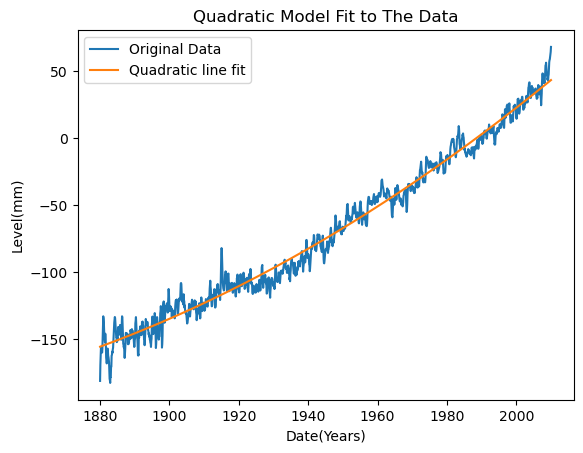

In [6]:

#Problem 1
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

data = np.loadtxt('../text-files/CSIRO_Recons_gmsl_mo_2011.txt', float, skiprows=1)

date = x = data[:,0]
level = y = data[:,1]
error = data[:,2]
N = len(x)

def model(x,a,b,c):
    return a + b*x + c * x**2


param, param_cov = curve_fit(model, x,y,sigma=error)
param_error = np.sqrt(np.diag(param_cov))

A = param[0]
B = param[1]
C = param[2]
Aunc = param_error[0]
Bunc = param_error[1]

Cunc = param_error[2]

# quadraticbestfit =  N*np.log(np.sum((y - (A+B*x+C*x**2))**2/N)) + 2*(3+1)

print(f'The uncertanties in the coeffecients:\nA = {A} +/- {Aunc}\nA = {B} +/- {Bunc}\nA = {C} +/- {Cunc}')
plt.plot(x,y,label='Original Data')
plt.plot(x,model(x,A,B,C), label='Quadratic line fit')
plt.xlabel('Date(Years)')
plt.ylabel('Level(mm)')
plt.title('Quadratic Model Fit to The Data')
plt.legend()
plt.show()

The parameters in y(t) that controls period of the peaks: Tau
chi-squared: 1.1449247433570802


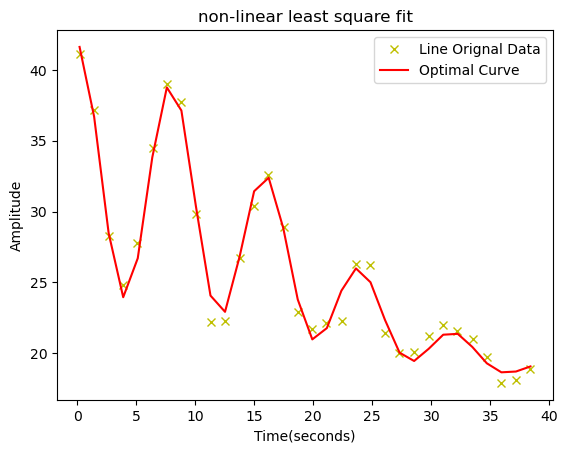

In [30]:
#Problem 2
import numpy as np
import matplotlib.pyplot as plt 
from scipy.optimize import curve_fit
#y(t) =  A(1+B cos(w t))e**(-t/2tal**2) + C
#y(0) = A(1+B) + C
#y(t => infinity) = C

data = np.loadtxt('../text-files/spec.txt',skiprows=0)
x = data[:,0]
y = data[:,1]
std = data[:,2]

def func(t,A,B,C,tau, omega):
    return A*(1+B*np.cos(omega*t))*np.exp((-t**2)/(2*tau**2)) + C

# p_initial = [15, .5, 17, 2*np.pi/4, 15]
p_initial = [1, 17, 18, 7, np.pi/4]



param, param_cov = curve_fit(func, x, y, p0=p_initial)
aFit = param[0]
bFit = param[1]
cFit = param[2]
tauFit = param[3]
omegaFit = param[4]

error = np.sqrt(np.diag(param_cov))

aUncert = error[0]
bUncert = error[1]
cUncert = error[2]
tauUncert = error[3]
omegaUncert = error[4]

# A = height, B =height, C=shift along y axis, tau=amount of peaks
xFit = np.linspace(x[0], x[-1], 32)
yFit = func(xFit, aFit, bFit,cFit, tauFit, omegaFit)

# yresize = np.linspace(y[0], y[-1], 200)
# errresize = np.linspace(std[0], std[1], 200)
#Observed - expected / error**2
def chisquared(ydata,yfit,error,dof):
    chisquared = np.sum(((ydata - yfit)/error)**2)
    return chisquared/dof
    

#dof = N-P
dof = len(x)-len(param)
# chisq = chisquared(yresize,yFit,errresize,dof)
chisq = chisquared(y,yFit,std,dof)
print(f'The parameters in y(t) that controls period of the peaks: Tau')
print(f'chi-squared: {chisq}')

# plt.errorbar(x,y,yerr=std, label='Orginal Data')
plt.plot(x, y, "yx", label='Line Orignal Data')
plt.plot(xFit, yFit, color='red', label='Optimal Curve')
plt.xlabel('Time(seconds)')
plt.ylabel('Amplitude')
plt.title('non-linear least square fit')
plt.legend()
plt.show()



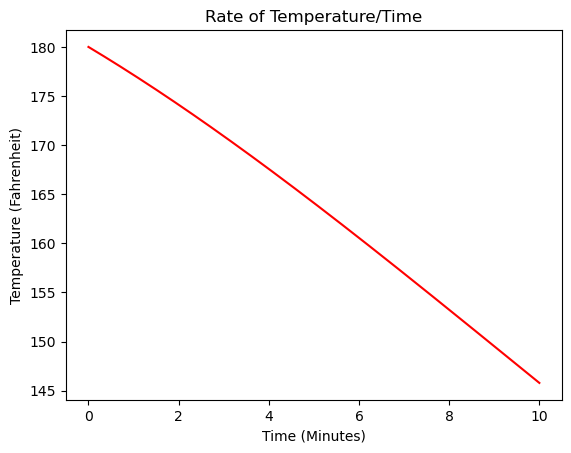

In [28]:
#Problem 3
import numpy as np
import matplotlib.pyplot as plt 
#per minute
r = 0.026
#temperature
initial_temp = 180.0
ambient_temp = 74

#time period in minutes
time_period = 10

def rate(temperature, time):
    return -r*(temperature-ambient_temp)*time/time_period


points = 200
x = np.linspace(0,10, points)
dt = x[1]-x[0]
y = np.zeros(points)
y[0] = initial_temp
time = 10 

for i in range(1,points):
    Tend = y[i-1] + rate(y[i-1], time)*dt
    tend = time + dt/2
    y[i] = y[i-1] + (rate(y[i-1], time) + rate(Tend,tend))*dt/2
    time = time + dt
    
plt.plot(x, y, 'r-')
plt.xlabel('Time (Minutes)')
plt.ylabel('Temperature (Fahrenheit)')
plt.title("Rate of Temperature/Time")
plt.show()

In [23]:
#Problem 4
import numpy as np
from scipy.optimize import fsolve

def equation(x):
    return 9**x - 6**x -4**x

valueOfX = 1

print(f'Fsolve solution for {x}: {fsolve(equation,valueOfX)}')

Fsolve solution for : [1.18681439]


In [20]:
#Problem 5
import numpy as np
from scipy.optimize import newton

def equation(x):
    return 5*x - 3*x**2 + 10*np.sin(x)-2

print(f'Newton-Raphson Method: {newton(equation,0.01)}')

Newton-Raphson Method: 0.13739683532179492
